In [ ]:
# Problem Statement

The new covid-era has provided a new way of living the work-life balance. We have seen a lot of different websites providing packages to work from different locations. From Kashmir to Kanyakumari, from Gujarat to Assam we have collected packages in and around India. It becomes really difficult to find the best place with all the amenities such as high-speed internet, a comfortable stay as well as within the budget. To solve the real-world problem of finding the best deals for a calm and enjoying workation trip. Workation is the best way to work at a remote location with a recreational and rejuvenating vacation for the team.

In this competition, one has to use the knowledge of machine learning, deep learning, and model building to predict the price per person for your next workstation trip. The data has more than 18000+ rows of different packages with the details like start location, hotel type, cost per person, destination, Itinerary, and many more.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
train = pd.read_csv('/content/Train.csv')
test = pd.read_csv('/content/Test.csv')

In [ ]:
train.shape,test.shape

((21000, 15), (9000, 14))

In [7]:
train.head(2)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5


In [66]:
combined = pd.concat([train,test],ignore_index=True)

In [67]:
combined.shape

(30000, 15)

In [68]:
combined.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


In [69]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Uniq Id                     30000 non-null  object 
 1   Package Name                30000 non-null  object 
 2   Package Type                30000 non-null  object 
 3   Destination                 30000 non-null  object 
 4   Itinerary                   30000 non-null  object 
 5   Places Covered              30000 non-null  object 
 6   Travel Date                 30000 non-null  object 
 7   Hotel Details               30000 non-null  object 
 8   Start City                  30000 non-null  object 
 9   Airline                     30000 non-null  object 
 10  Flight Stops                30000 non-null  int64  
 11  Meals                       30000 non-null  int64  
 12  Sightseeing Places Covered  30000 non-null  object 
 13  Cancellation Rules          300

In [70]:
import warnings
warnings.filterwarnings('ignore')

In [71]:
# convert the travel date into datetime
combined['Travel Date'] = pd.to_datetime(combined['Travel Date'])

In [72]:
# Extract the Date , month and year
combined['Date'] = combined['Travel Date'].dt.day
combined['Month'] = combined['Travel Date'].dt.month
combined['Year'] = combined['Travel Date'].dt.year




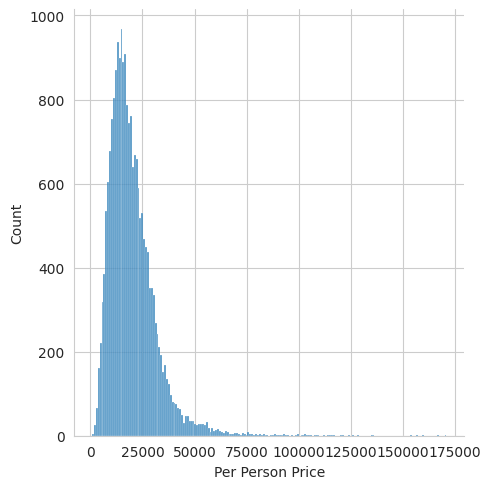

In [73]:
# Lets analyse the target variable...
sns.displot(x='Per Person Price',data=combined)
plt.show()

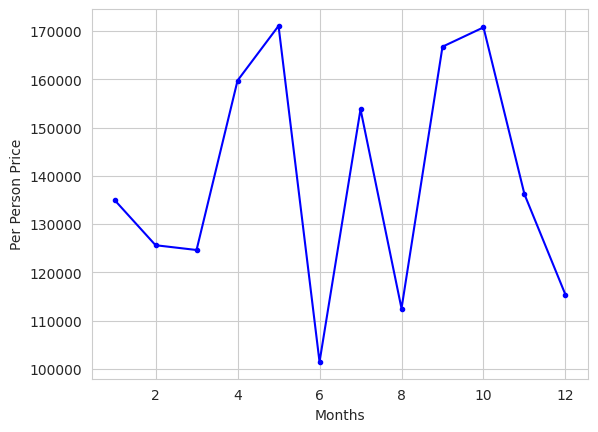

In [74]:
# Lets analyse the target variable with respect to month

sns.set_style('whitegrid')

max_month = combined.groupby('Month')['Per Person Price'].max()
plt.plot(max_month.index,max_month,color='blue',marker='.')
plt.xlabel('Months')
plt.ylabel('Per Person Price')
plt.show()

# peak months = 4,5,7,9,10

In [75]:
# peak months = 4,5,7,9,10
combined['Peak_Months']=combined.Month.apply(lambda x: 'peak_month' if x in [4,5,7,9,10] else 'normal_month')

<Axes: xlabel='Peak_Months', ylabel='Per Person Price'>

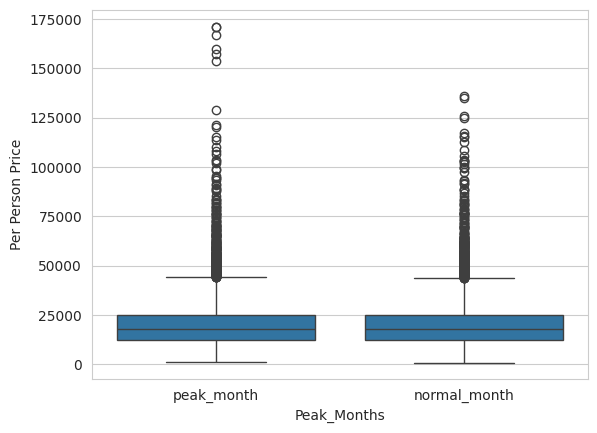

In [76]:
sns.boxplot(x = 'Peak_Months',y='Per Person Price',data=combined)

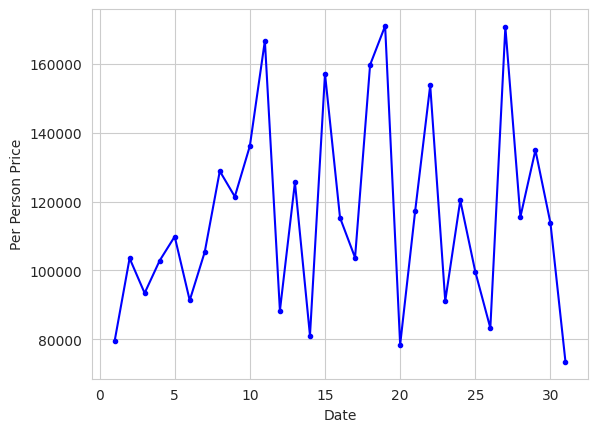

In [77]:
# Lets analyse the target variable with respect to month

sns.set_style('whitegrid')

max_month = combined.groupby('Date')['Per Person Price'].max()
plt.plot(max_month.index,max_month,color='blue',marker='.')
plt.xlabel('Date')
plt.ylabel('Per Person Price')
plt.show()


In [78]:
# Peak Dates : 8,9,10,11,13,15,18,19,22,24,27,29

combined['Peak_Date']=combined.Date.apply(lambda x: 'peak_date' if x in [8,9,10,11,13,15,18,19,22,24,27,29] else 'normal_date')

<Axes: xlabel='Peak_Date', ylabel='Per Person Price'>

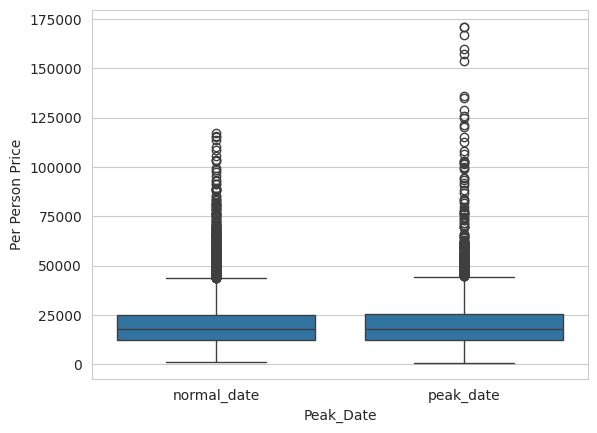

In [79]:
sns.boxplot(x = 'Peak_Date',y='Per Person Price',data=combined)

In [80]:
combined.head(2)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Date,Month,Year,Peak_Months,Peak_Date
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,2021-07-30,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,30,7,2021,peak_month,normal_date
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,2021-12-08,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,8,12,2021,normal_month,peak_date


In [81]:
combined.shape

(30000, 20)

In [82]:
combined['Location_count'] = combined['Destination'].apply(lambda x: len(x.split('|')))

In [83]:
combined['Airline_count'] = combined['Airline'].apply(lambda x: len(x.split('|')))

In [84]:
#combined['Airline_count'] = combined['Sightseeing Places Covered'].apply(lambda x: len(x.split('|')))

In [85]:
def clean_text(text):
  # remove the hyperlinks and special charectors
  text = re.sub('(www.+)|(https:.?)|(@[a-zA-Z])|(\W+)|(\s+)'," ",text)
  text = re.sub('[^a-zA-Z0-9]'," ", text)
  text = re.sub('\w+:/\S+'," ",text)  # select the weblink and remove it
  text = re.sub('\s'," ",text).strip() # remove extra white spaces
  text = re.sub('\d+'," ",text) # Remove Digits
  return(text)


In [86]:
# function for sight seeing
def regex_sight(text):
  text = re.sub('\[^a-zA-Z0-9|]+'," ",text)
  text = re.sub('\s+'," ",text).strip()
  return(text)

In [87]:
import re

In [88]:
len(combined['Sightseeing Places Covered'].apply(regex_sight)[1].split('|'))

7

In [89]:
combined['Sightseeing Places Covered'] = combined['Sightseeing Places Covered'].apply(regex_sight)

In [90]:
combined['Count_Sightseeing'] = combined['Sightseeing Places Covered'].apply(lambda x:len(x.split("|")))

In [92]:
combined.Count_Sightseeing.describe()

count    30000.000000
mean         7.556133
std          4.726908
min          1.000000
25%          3.000000
50%          7.000000
75%         11.000000
max         23.000000
Name: Count_Sightseeing, dtype: float64

In [93]:
combined.Itinerary.unique()

array(['1N New Delhi . 2N Shimla . 2N Manali . 1N Chandigarh',
       '1N Srinagar . 2N Pahalgam . 1N Srinagar',
       '2N Udaipur . 1N Chittorgarh',
       '2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kovalam and Poovar',
       '4N Pattaya . 3N Bangkok', '2N Cochin', '3N Jaipur',
       '2N Kasol . 3N Manali',
       '1N Srinagar . 1N Gulmarg . 2N Pahalgam . 2N Srinagar',
       '2N Udaipur', '2N Kovalam and Poovar . 1N Kanyakumari',
       '1N Cochin . 2N Munnar . 1N Allepey . 2N Kovalam and Poovar',
       '1N Guwahati', '2N Udaipur . 1N Mount Abu',
       '1N Chandigarh . 2N Shimla . 3N Manali . 1N Chandigarh',
       '2N Nainital . 1N Kausani . 2N Corbett', '3N Kodaikanal',
       '1N Srinagar . 1N Gulmarg . 2N Srinagar',
       '2N Shimla . 3N Manali . 2N Dharamshala',
       '3N Ooty . 3N Kodaikanal', '2N Kodaikanal . 2N Ooty . 1N Mysore',
       '2N Jaipur', '1N New Delhi . 1N Agra . 1N Jaipur', '7N Dubai',
       '3N Goa', '3N Gangtok . 1N Pelling . 4N Darjeeling',
       '2N

In [95]:
np.sum(pd.to_numeric(re.findall("\d+",combined.Itinerary.unique()[0])))

6

In [96]:
def duration(text):
  text = re.findall("\d+",text)
  count = np.sum(pd.to_numeric(text))
  return(count)

In [99]:
combined['Holidays']= combined.Itinerary.apply(duration)

In [102]:
combined['Package Name'] = combined['Package Name'].apply(clean_text)

In [103]:
combined['Package Name'].unique()

array(['Best of Shimla and Manali Holiday from Delhi',
       'Kashmir Valley vacation',
       'Might of Mewar Udaipur and Chittorgarh', ...,
       'Unique Kerala Backwater Experience Purity at Lake Vembanad',
       'Himachal Hues   Nights from Delhi Shared Vehicle',
       'Ladakh Holiday with Pangong Excursion With Flights'], dtype=object)

In [107]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [108]:
# lets apply the sentence tokenizer
sentences = [sent_tokenize(word) for word in combined['Package Name']]

In [112]:
# Stopwords
stop = stopwords.words('english')
tokens = [word for word in sentences if word not in stop]

<Axes: xlabel='0'>

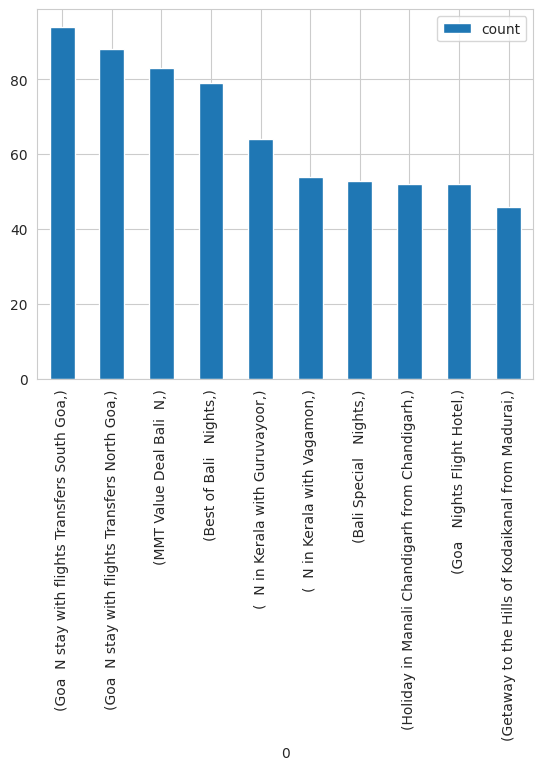

In [116]:
pd.DataFrame(pd.DataFrame(tokens).value_counts())[:10].plot(kind='bar')

In [117]:
combined.head(1)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,...,Per Person Price,Date,Month,Year,Peak_Months,Peak_Date,Location_count,Airline_count,Count_Sightseeing,Holidays
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,2021-07-30,Not Available,Mumbai,Not Available,...,11509.0,30,7,2021,peak_month,normal_date,4,1,1,6


In [118]:
combined.columns

Index(['Uniq Id', 'Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Flight Stops', 'Meals', 'Sightseeing Places Covered',
       'Cancellation Rules', 'Per Person Price', 'Date', 'Month', 'Year',
       'Peak_Months', 'Peak_Date', 'Location_count', 'Airline_count',
       'Count_Sightseeing', 'Holidays'],
      dtype='object')

In [119]:
combined['Hotel Details'].unique()

array(['Not Available',
       'The Orchard Retreat & Spa:4.6|WelcomHotel Pine N Peak Pahalgam - Member ITC Hotel Group:4.1|The Orchard Retreat & Spa:4.6',
       'The Ananta:4.4|juSTa Lake Nahargarh Palace:4', ...,
       'Marari Beach - CGH Earth:4.6|Niraamaya Retreats Surya Samudra:4.5',
       'The Oberoi Cecil:Five|Fernhill Resort:Three',
       'Poppys Hotel:4.1|Hyatt Place Rameswaram:4.4|Hotel Temple Citi:4.2|Over The Hill-MMT Holidays Special:|Uday Backwater Resort-MMT Holidays Special:|Tea Village-MMT Holidays Special:'],
      dtype=object)

In [121]:
def regex_hotels(text):
  text = re.findall("[0-9].\d+|[\d.]+",text)
  text = np.median(pd.to_numeric(text))
  return(float(text))

# Not working


In [123]:
combined['New_Hotel'] = combined['Hotel Details'].apply(regex_sight)

In [124]:
combined['Hotel_count'] = combined.New_Hotel.apply(lambda x: len(str(x).split('|')))

In [130]:
new = combined.drop(['Uniq Id', 'Package Name', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details','Airline','Sightseeing Places Covered','Cancellation Rules','Date', 'Year'],axis=1)

In [125]:
combined.columns

Index(['Uniq Id', 'Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Flight Stops', 'Meals', 'Sightseeing Places Covered',
       'Cancellation Rules', 'Per Person Price', 'Date', 'Month', 'Year',
       'Peak_Months', 'Peak_Date', 'Location_count', 'Airline_count',
       'Count_Sightseeing', 'Holidays', 'New_Hotel', 'Hotel_count'],
      dtype='object')

In [133]:
new['holiday_freq'] = new.groupby('Month')['Holidays'].transform('count')
new['holiday_min'] = new.groupby('Month')['Holidays'].transform('min')
new['holiday_max'] = new.groupby('Month')['Holidays'].transform('max')
new['holiday_mean'] = new.groupby('Month')['Holidays'].transform('mean')
new['holiday_median'] = new.groupby('Month')['Holidays'].transform('median')

In [131]:
new.groupby(['Package Type'])['Holidays'].describe()

,count,mean,std,min,25%,50%,75%,max
Package Type,,,,,,,,
Budget,682.0,3.478006,1.272186,1.0,3.0,3.0,4.0,7.0
Deluxe,8499.0,4.777974,1.749896,1.0,3.0,5.0,6.0,12.0
Luxury,4688.0,4.663183,1.792593,1.0,3.0,5.0,6.0,12.0
Premium,7960.0,4.765829,1.821384,1.0,3.0,5.0,6.0,14.0
Standard,8171.0,4.759148,1.806489,1.0,3.0,5.0,6.0,14.0


In [132]:
new['magic1'] = new.groupby(['Package Type'])['Holidays'].transform('count')
new['magic2'] = new.groupby(['Package Type'])['Holidays'].transform('mean')
new['magic3'] = new.groupby(['Package Type'])['Holidays'].transform('median')
new['magic4'] = new.groupby(['Package Type'])['Holidays'].transform('min')
new['magic5'] = new.groupby(['Package Type'])['Holidays'].transform('max')

In [134]:
new['magic_1'] = new.groupby(['Package Type'])['Per Person Price'].transform('count')
new['magic_2'] = new.groupby(['Package Type'])['Per Person Price'].transform('mean')
new['magic_3'] = new.groupby(['Package Type'])['Per Person Price'].transform('median')
new['magic_4'] = new.groupby(['Package Type'])['Per Person Price'].transform('min')
new['magic_5'] = new.groupby(['Package Type'])['Per Person Price'].transform('max')

In [135]:
new.isnull().sum()

Package Type            0
Start City              0
Flight Stops            0
Meals                   0
Per Person Price     9000
Month                   0
Peak_Months             0
Peak_Date               0
Location_count          0
Airline_count           0
Count_Sightseeing       0
Holidays                0
New_Hotel               0
Hotel_count             0
magic1                  0
magic2                  0
magic3                  0
magic4                  0
magic5                  0
holiday_freq            0
holiday_min             0
holiday_max             0
holiday_mean            0
holiday_median          0
magic_1                 0
magic_2                 0
magic_3                 0
magic_4                 0
magic_5                 0
dtype: int64

In [136]:
new.head(2)

,Package Type,Start City,Flight Stops,Meals,Per Person Price,Month,Peak_Months,Peak_Date,Location_count,Airline_count,...,holiday_freq,holiday_min,holiday_max,holiday_mean,holiday_median,magic_1,magic_2,magic_3,magic_4,magic_5
0,Standard,Mumbai,2,3,11509.0,7,peak_month,normal_date,4,1,...,2998,1,14,4.750834,5.0,5669,16354.089081,14729.5,791.0,153795.0
1,Premium,New Delhi,0,5,22485.5,12,normal_month,peak_date,3,2,...,1709,1,14,4.745465,5.0,5581,23965.407006,21767.5,2967.0,170763.0


In [137]:
new.drop(['Month'],axis=1,inplace=True)

In [138]:
new.head(2)

,Package Type,Start City,Flight Stops,Meals,Per Person Price,Peak_Months,Peak_Date,Location_count,Airline_count,Count_Sightseeing,...,holiday_freq,holiday_min,holiday_max,holiday_mean,holiday_median,magic_1,magic_2,magic_3,magic_4,magic_5
0,Standard,Mumbai,2,3,11509.0,peak_month,normal_date,4,1,1,...,2998,1,14,4.750834,5.0,5669,16354.089081,14729.5,791.0,153795.0
1,Premium,New Delhi,0,5,22485.5,normal_month,peak_date,3,2,7,...,1709,1,14,4.745465,5.0,5581,23965.407006,21767.5,2967.0,170763.0


In [139]:
mapp = {'Budget':1,'Deluxe':5,'Luxury':2,'Premium':4,'Standard':3}
new['Package Type'] = new['Package Type'].map(mapp)

In [140]:
new.columns,new.shape

(Index(['Package Type', 'Start City', 'Flight Stops', 'Meals',
        'Per Person Price', 'Peak_Months', 'Peak_Date', 'Location_count',
        'Airline_count', 'Count_Sightseeing', 'Holidays', 'New_Hotel',
        'Hotel_count', 'magic1', 'magic2', 'magic3', 'magic4', 'magic5',
        'holiday_freq', 'holiday_min', 'holiday_max', 'holiday_mean',
        'holiday_median', 'magic_1', 'magic_2', 'magic_3', 'magic_4',
        'magic_5'],
       dtype='object'),
 (30000, 28))

In [141]:
# split the Data into Train and test
newtrain = new.loc[0:train.shape[0]-1,:]
newtest = new.loc[train.shape[0]:,:]

train.shape,test.shape,newtrain.shape,newtest.shape

((21000, 15), (9000, 14), (21000, 28), (9000, 28))

In [142]:
# Drop the target variable from the
newtrain.drop('New_Hotel',axis=1,inplace=True)
newtest.drop(['New_Hotel','Per Person Price'],axis=1,inplace=True)

#dummyfy..
dummytrain = pd.get_dummies(newtrain,drop_first=True)
dummytest = pd.get_dummies(newtest,drop_first=True)

dummytrain.shape,dummytest.shape




((21000, 27), (9000, 26))

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score

In [151]:
def base_models():
  models = dict()
  models['LR'] = LinearRegression()
  models['Tree'] = DecisionTreeRegressor()
  models['RF'] = RandomForestRegressor()
  models['GBM'] = GradientBoostingRegressor()
  models['XGBOOST'] = XGBRegressor()
  models['LGBM'] = LGBMRegressor()
  return models

In [154]:
from sklearn.model_selection import KFold

In [155]:
# Function to evaluate the models...

def eval_models(model):
  cv=KFold(n_splits=5,shuffle=True,random_state=4042024)
  score = -cross_val_score(estimator=model,X=x,y=y,scoring='neg_root_mean_squared_error',n_jobs=-1)
  return(score)

In [156]:
x= dummytrain.drop('Per Person Price',axis=1)
y= dummytrain['Per Person Price']

# Lets use the function to calculate the scores...
models = base_models()
results,modelname = list(),list()

for name,mymodel in models.items(): # it will evaluate the model
  finalscore = eval_models(mymodel)
  results.append(finalscore)
  modelname.append(name)
  print(name,np.mean(finalscore))


LR 8205.434858481818
Tree 9449.105314681785
RF 7351.195108486014
GBM 7446.800699747009
XGBOOST 7080.3293863757835
LGBM 7113.309232279993


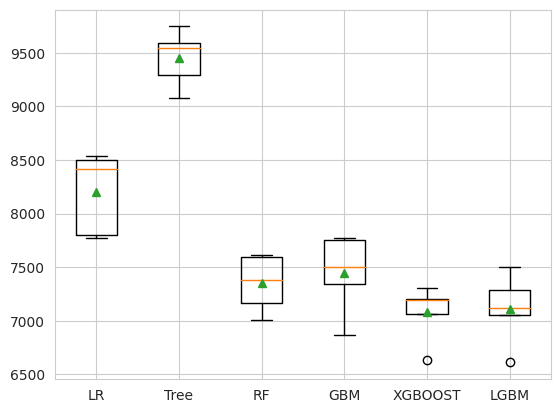

In [157]:
plt.boxplot(x=results,labels=modelname,showmeans=True)
plt.show()

In [158]:
# Stacking model
from sklearn.ensemble import StackingRegressor
rf = RandomForestRegressor()
gbm = GradientBoostingRegressor()
lgbm = LGBMRegressor()
xgb = XGBRegressor()

stack = StackingRegressor(estimators = [('RF',rf),('GBM',gbm),('LGBM',lgbm)],final_estimator=xgb)

prediction = stack.fit(x,y).predict(dummytest)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 172
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 24
[LightGBM] [Info] Start training from score 20059.330381
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 24
[LightGBM] [Info] Start training from score 20072.302351
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[Light

In [160]:
# Submission File...
submission = pd.DataFrame({'Per Person Price':prediction})
submission.to_csv('submission1.csv',index=False)

In [162]:
newtest.columns

Index(['Package Type', 'Start City', 'Flight Stops', 'Meals', 'Peak_Months',
       'Peak_Date', 'Location_count', 'Airline_count', 'Count_Sightseeing',
       'Holidays', 'Hotel_count', 'magic1', 'magic2', 'magic3', 'magic4',
       'magic5', 'holiday_freq', 'holiday_min', 'holiday_max', 'holiday_mean',
       'holiday_median', 'magic_1', 'magic_2', 'magic_3', 'magic_4',
       'magic_5'],
      dtype='object')